In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from datetime import datetime

In [67]:
def convert_raw_data(dataframe):
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    dataframe['Open'] = dataframe['Open'].replace({',': ''}, regex=True).apply(pd.to_numeric)
    dataframe['Price'] = dataframe['Price'].replace({',': ''}, regex=True).apply(pd.to_numeric)
    dataframe['High'] = dataframe['High'].replace({',': ''}, regex=True).apply(pd.to_numeric)
    dataframe['Low'] = dataframe['Low'].replace({',': ''}, regex=True).apply(pd.to_numeric)
    dataframe = dataframe.sort_values(by='Date', ascending=True).reset_index(drop=True)
    return dataframe

In [68]:
def create_weekdays_december_january_dataframe():
    start_date = datetime(2023, 12, 16)
    end_date = datetime(2024, 1, 31)
    date_range = pd.date_range(start_date, end_date)
    df = pd.DataFrame({"Date": date_range})
    df = df[(df["Date"].dt.dayofweek != 5) & (df["Date"].dt.dayofweek != 6)]
    new_df = pd.DataFrame({"Date": df["Date"].dt.strftime('%Y-%m-%d')})

    new_df = new_df.head(30)
    return new_df

In [69]:
df = pd.read_csv('VNI.csv')
df = convert_raw_data(df)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2010-01-04,517.05,501.74,517.05,501.74,44.92K,4.50%
1,2010-01-05,532.53,529.23,539.39,529.23,70.05K,2.99%
2,2010-01-06,534.46,529.47,538.84,526.37,67.36K,0.36%
3,2010-01-07,533.34,536.78,540.77,530.68,75.68K,-0.21%
4,2010-01-08,520.90,540.95,544.49,520.90,84.72K,-2.33%


In [70]:
ratio = 0.9
# Chia dữ liệu thành train và test với tỷ lệ 80-20
train_size = int(len(df) * ratio)
train_data, test_data = df[:train_size], df[train_size:]

# Tạo X và y cho training
X_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data["Open"]

# Tạo X và y cho testing
X_test = np.arange(train_size, len(df)).reshape(-1, 1)
y_test = test_data["Open"]

# Tạo và fit model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


# Dự đoán 30 ngày tiếp theo
future_dates = pd.date_range(start=df["Date"].iloc[-1] + pd.Timedelta(days=1), periods=30, freq="D")
future_X = np.arange(len(df), len(df) + 30).reshape(-1, 1)
future_pred = model.predict(future_X)

# Hiển thị dự đoán 30 ngày tiếp theo
future_df = pd.DataFrame({"Date": future_dates, "Predicted_Value": future_pred})
print("\nPredictions for the next 30 days:")
# print(future_df)



Predictions for the next 30 days:


In [71]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.2f}')
print('rato', ratio)


MAE: 163.68960713052041
MSE: 31823.672730902643
RMSE: 178.39190769455504
MAPE: 15.25
rato 0.9


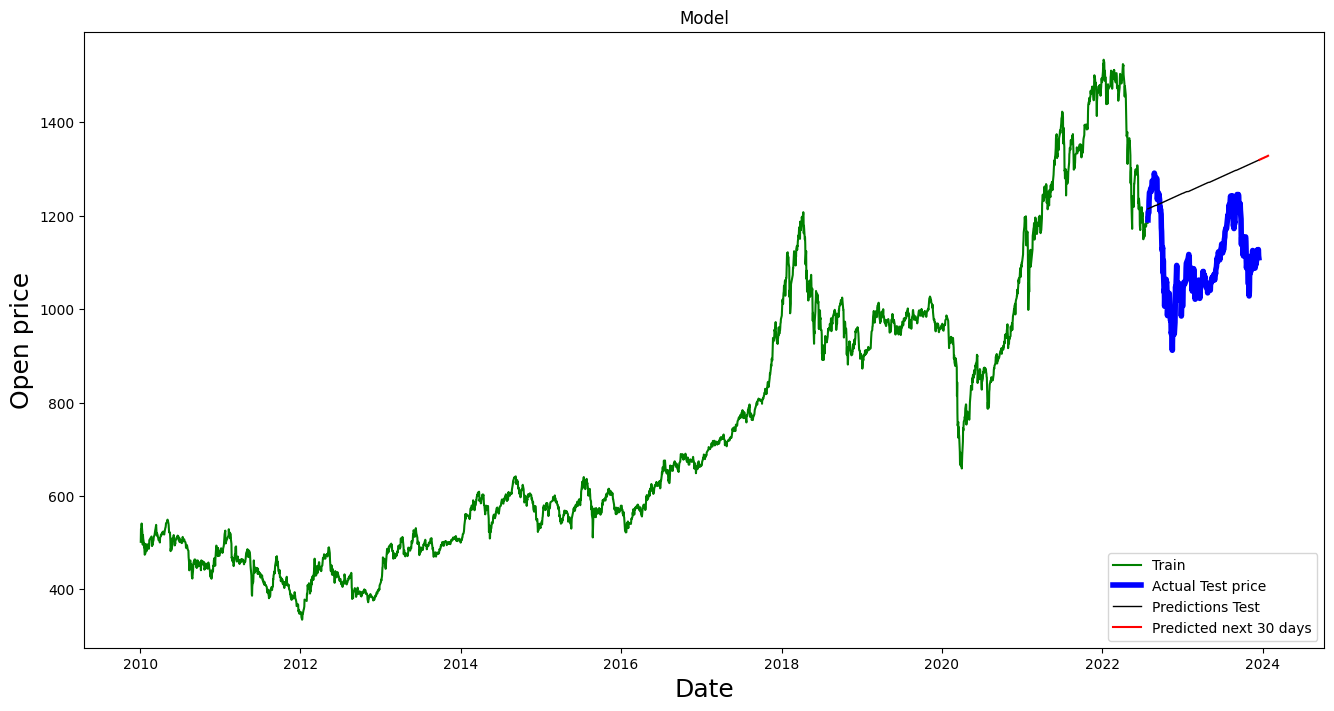

In [72]:
predicted_date = create_weekdays_december_january_dataframe()
# plt.figure(figsize=(20, 10))
# future_30_days_df = pd.DataFrame(future_df['Predicted_Value'], index=predicted_date["Date"], columns=["Open"])
predicted_date['Date'] = pd.to_datetime(predicted_date['Date'] )
future_df['Date'] = predicted_date["Date"]
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open price', fontsize=18)
plt.plot(train_data['Date'],train_data['Open'], color='green')
plt.plot(test_data['Date'],test_data[['Open']], color='blue', lw=4)
plt.plot(test_data['Date'], y_pred, color='black',lw=1)
plt.plot(predicted_date["Date"], future_df['Predicted_Value'], label='Predicted next 30 days', color = 'red')
# plt.plot(['Open'], color = 'blue')
plt.legend(['Train', 'Actual Test price', 'Predictions Test', 'Predicted next 30 days'], loc='lower right')
plt.show()